# Introduction
We will be exploring the correlation between pokemon popularity compared to their characteristics.

The characteristics we will be comparing are
- Shape
- Typing
- Color
- Generation Introduced
- Legendary/Mythical
- Form Switchable

In [34]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
cwd = os.getcwd()
print(cwd)

c:\Users\drago\OneDrive\Documents\Projects\Pokemon-Popularity


In [35]:
#importing data from https://www.kaggle.com/datasets/kylekohnen/complete-pokemon-data-set
stats = pd.read_csv(cwd + '\data\complete-pokemon-set.csv')
stats

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [36]:
#Data pulled from survey https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/
popular_data = pd.read_csv(cwd + '\data\Favourite_Pokemon_responses-Results.csv')
popular_data

,Results in full,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Select a Pokémon here to see how many votes it got,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Number of pokemon by number of votes,Unnamed: 18,Unnamed: 19,Unnamed: 20,By type,Psychic,Unnamed: 23,By Gen,5
0,Bulbasaur,710.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,Fletchling,6,NaN,...,NaN,Pokemon,Votes,%,NaN,Pokemon,Votes,NaN,Pokemon,Votes
1,Ivysaur,83.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,4,0,0.49%,NaN,Gardevoir,585,NaN,Volcarona,290
2,Venusaur,127.0,Grass Poison,1.0,Bulbasaur,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1,0.99%,NaN,Metagross,395,NaN,Chandelure,222
3,Charmander,374.0,Fire,1.0,Charmander,NaN,NaN,Number of valid votes:,52725,NaN,...,NaN,28,2,3.46%,NaN,Espeon,384,NaN,Hydreigon,166
4,Charmeleon,70.0,Fire,1.0,Charmander,NaN,NaN,Average per pokémon,65,NaN,...,NaN,24,3,2.97%,NaN,Alakazam,376,NaN,Zoroark,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1095,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1096,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1097,0.00%,NaN,NaN,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1098,0.00%,NaN,NaN,NaN,NaN,NaN,NaN


# Clean Data, merge, and calculate new values to explore

## Clean

### Popular vote
This data set has many columns that we do not need that will need to be dropped

In [37]:
# Dropping unnessecary data
pop = popular_data.loc[0:808, ['Results in full', 'Unnamed: 1']]

pop

,Results in full,Unnamed: 1
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [38]:
# Renaming columns to make lookup and merge easier
pop = pop.rename(columns={'Results in full':'name', 'Unnamed: 1':'votes'})
pop

,name,votes
0,Bulbasaur,710.0
1,Ivysaur,83.0
2,Venusaur,127.0
3,Charmander,374.0
4,Charmeleon,70.0
...,...,...
804,Stakataka,13.0
805,Blacephalon,8.0
806,Zeraora,17.0
807,Meltan,3.0


In [39]:
# Reseting index and using that to make the national pokedex (nat_dex) number that will be used later to form a merge
pop = pop.reset_index()
pop = pop.rename(columns={"index":"nat_dex"})
pop['nat_dex'] = pop.index + 1
pop

,nat_dex,name,votes
0,1,Bulbasaur,710.0
1,2,Ivysaur,83.0
2,3,Venusaur,127.0
3,4,Charmander,374.0
4,5,Charmeleon,70.0
...,...,...,...
804,805,Stakataka,13.0
805,806,Blacephalon,8.0
806,807,Zeraora,17.0
807,808,Meltan,3.0


### Stats
This data set has data that will not be nessisary for our exploration, some columns that will be easer if we split the data into two columns

In [40]:
# Getting a list of columns to see what we should drop and split to make managing the dataframe easier
stats.columns

Index(['name', 'pokedex_number', 'abilities', 'typing', 'hp', 'attack',
       'defense', 'special_attack', 'special_defense', 'speed', 'height',
       'weight', 'genus', 'gen_introduced', 'female_rate', 'genderless',
       'baby_pokemon', 'legendary', 'mythical', 'is_default',
       'forms_switchable', 'base_experience', 'capture_rate', 'egg_groups',
       'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from',
       'primary_color', 'shape', 'number_pokemon_with_typing',
       'normal_attack_effectiveness', 'fire_attack_effectiveness',
       'water_attack_effectiveness', 'electric_attack_effectiveness',
       'grass_attack_effectiveness', 'ice_attack_effectiveness',
       'fighting_attack_effectiveness', 'poison_attack_effectiveness',
       'ground_attack_effectiveness', 'fly_attack_effectiveness',
       'psychic_attack_effectiveness', 'bug_attack_effectiveness',
       'rock_attack_effectiveness', 'ghost_attack_effectiveness',
       'dragon_attack_effectiveness', '

In [41]:
#Spliting the typing column into two columns
stats[['type1','type2']] = stats['typing'].str.split('~', expand=True)
stats[['egg_group1','egg_group2']] = stats['egg_groups'].str.split('~', expand=True)
stats

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,type1,type2,egg_group1,egg_group2
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,1.0,0.5,Grass,Poison,Monster,Grass
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,1.0,0.5,Grass,Poison,Monster,Grass
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,0.5,Grass,Poison,Monster,Grass
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,0.5,Grass,Poison,Monster,Grass
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,1.0,0.5,Grass,Poison,Monster,Grass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,2.0,1.0,1.0,1.0,2.0,1.0,Ice,None,Undiscovered,None
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,2.0,1.0,2.0,1.0,1.0,Ghost,None,Undiscovered,None
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,1.0,2.0,1.0,2.0,1.0,1.0,Psychic,Grass,Undiscovered,None
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,2.0,2.0,1.0,2.0,2.0,1.0,Psychic,Ice,Undiscovered,None


In [42]:
# Dropping all columns that have '_attack_effectiveness' at the end of their column name
stats = stats.loc[:,~stats.columns.str.endswith('_attack_effectiveness')]
# Dropping other columns that will be unused
columns_to_drop = ['abilities', 'typing', 'height', 'weight','female_rate', 'genderless',
                   'baby_pokemon', 'genus', 'base_experience', 'capture_rate', 'egg_groups',
                   'egg_cycles', 'base_happiness', 'can_evolve', 'evolves_from', 'number_pokemon_with_typing']
stats = stats.drop(columns=columns_to_drop)
stats.head()

,name,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2
0,Bulbasaur,1,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass
1,Ivysaur,2,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass
2,Venusaur,3,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped,Grass,Poison,Monster,Grass
3,Venusaur Gmax,3,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped,Grass,Poison,Monster,Grass
4,Venusaur Mega,3,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped,Grass,Poison,Monster,Grass


In [43]:
# Renaming pokedex_number to nat_dex to be used as key for merge later
stats = stats.rename(columns={'pokedex_number': 'nat_dex'})
stats.columns

Index(['name', 'nat_dex', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'gen_introduced', 'legendary', 'mythical',
       'is_default', 'forms_switchable', 'primary_color', 'shape', 'type1',
       'type2', 'egg_group1', 'egg_group2'],
      dtype='object')

In [44]:
# Dropping data for pokemon that did not exist during survey
stats = stats[stats.nat_dex < 810]
stats.tail()

,name,nat_dex,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2
995,Blacephalon,806,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid,Fire,Ghost,Undiscovered,None
996,Zeraora,807,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid,Electric,None,Undiscovered,None
997,Meltan,808,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball,Steel,None,Undiscovered,None
998,Melmetal,809,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid,Steel,None,Undiscovered,None
999,Melmetal Gmax,809,135,143,143,80,65,34,7,False,True,False,False,Gray,Humanoid,Steel,None,Undiscovered,None


In [45]:
# reogranizing columns so first column is the nat_dex number
stats.insert(0, 'nat_dex', stats.pop('nat_dex'))
stats.head()


,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2
0,1,Bulbasaur,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass
1,2,Ivysaur,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass
2,3,Venusaur,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped,Grass,Poison,Monster,Grass
3,3,Venusaur Gmax,80,82,83,100,100,80,1,False,False,False,True,Green,Quadruped,Grass,Poison,Monster,Grass
4,3,Venusaur Mega,80,100,123,122,120,80,1,False,False,False,True,Green,Quadruped,Grass,Poison,Monster,Grass


In [46]:
# dropping rows for alternate forms of each pokemon
def_stats = stats[stats['is_default'] ==True]
def_stats = def_stats.reset_index(drop=True)
# making sure that nat_dex should be 1 more that index
def_stats.tail()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2
804,805,Stakataka,61,131,211,53,101,13,7,False,False,True,False,Gray,Quadruped,Rock,Steel,Undiscovered,None
805,806,Blacephalon,53,127,53,151,79,107,7,False,False,True,False,White,Humanoid,Fire,Ghost,Undiscovered,None
806,807,Zeraora,88,112,75,102,80,143,7,False,True,True,False,Yellow,Humanoid,Electric,None,Undiscovered,None
807,808,Meltan,46,65,65,55,35,34,7,False,True,True,False,Gray,Ball,Steel,None,Undiscovered,None
808,809,Melmetal,135,143,143,80,65,34,7,False,True,True,False,Gray,Humanoid,Steel,None,Undiscovered,None


# Merge
Merging dataframes based on nat_dex

In [47]:
poke = def_stats.merge(pop, how='left', on='nat_dex')
poke['votes'] = poke['votes'].astype('int64')
poke.head()

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,...,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2,name_y,votes
0,1,Bulbasaur,45,49,49,65,65,45,1,False,...,True,False,Green,Quadruped,Grass,Poison,Monster,Grass,Bulbasaur,710
1,2,Ivysaur,60,62,63,80,80,60,1,False,...,True,False,Green,Quadruped,Grass,Poison,Monster,Grass,Ivysaur,83
2,3,Venusaur,80,82,83,100,100,80,1,False,...,True,True,Green,Quadruped,Grass,Poison,Monster,Grass,Venusaur,127
3,4,Charmander,39,52,43,60,50,65,1,False,...,True,False,Red,Upright,Fire,None,Monster,Dragon,Charmander,374
4,5,Charmeleon,58,64,58,80,65,80,1,False,...,True,False,Red,Upright,Fire,None,Monster,Dragon,Charmeleon,70


In [48]:
# making sure name that don't matches are just due to spelling or forms
poke.loc[~(poke['name_x'] == poke['name_y'])]

,nat_dex,name_x,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,...,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2,name_y,votes
28,29,Nidoran F,55,47,52,40,40,41,1,False,...,True,False,Blue,Quadruped,Poison,None,Monster,Field,Nidoran-F,7
31,32,Nidoran M,46,57,40,40,40,50,1,False,...,True,False,Purple,Quadruped,Poison,None,Monster,Field,Nidoran-M,18
121,122,Mr Mime,40,45,65,100,120,90,1,False,...,True,False,Pink,Humanoid,Psychic,Fairy,Human-Like,None,Mr-Mime,70
249,250,Ho Oh,106,130,90,110,154,90,2,True,...,True,False,Red,Wings,Fire,Flying,Undiscovered,None,Ho-Oh,49
385,386,Deoxys Normal,50,150,50,150,50,150,3,False,...,True,True,Red,Humanoid,Psychic,None,Undiscovered,None,Deoxys,75
412,413,Wormadam Plant,60,59,85,79,105,36,4,False,...,True,False,Green,Blob,Bug,Grass,Bug,None,Wormadam,4
438,439,Mime Jr,20,25,45,70,90,60,4,False,...,True,False,Pink,Humanoid,Psychic,Fairy,Undiscovered,None,Mime-Jr,9
473,474,Porygon Z,85,80,70,135,75,90,4,False,...,True,False,Red,Arms,Normal,None,Mineral,None,Porygon-Z,148
486,487,Giratina Altered,150,100,120,100,120,90,4,True,...,True,True,Black,Tentacles,Ghost,Dragon,Undiscovered,None,Giratina,157
491,492,Shaymin Land,100,100,100,100,100,100,4,False,...,True,True,Green,Quadruped,Grass,None,Undiscovered,None,Shaymin,112


In [49]:
# dropping the redundent name column and renaming 'name'
poke = poke.drop(columns='name_y')
poke = poke.rename(columns={'name_x':'name'})
poke.head()

,nat_dex,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,mythical,is_default,forms_switchable,primary_color,shape,type1,type2,egg_group1,egg_group2,votes
0,1,Bulbasaur,45,49,49,65,65,45,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass,710
1,2,Ivysaur,60,62,63,80,80,60,1,False,False,True,False,Green,Quadruped,Grass,Poison,Monster,Grass,83
2,3,Venusaur,80,82,83,100,100,80,1,False,False,True,True,Green,Quadruped,Grass,Poison,Monster,Grass,127
3,4,Charmander,39,52,43,60,50,65,1,False,False,True,False,Red,Upright,Fire,None,Monster,Dragon,374
4,5,Charmeleon,58,64,58,80,65,80,1,False,False,True,False,Red,Upright,Fire,None,Monster,Dragon,70


In [50]:
# checking to see how many non-null there is for each column. only type2 and egg_group2 should not be the same
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nat_dex           809 non-null    int64 
 1   name              809 non-null    object
 2   hp                809 non-null    int64 
 3   attack            809 non-null    int64 
 4   defense           809 non-null    int64 
 5   special_attack    809 non-null    int64 
 6   special_defense   809 non-null    int64 
 7   speed             809 non-null    int64 
 8   gen_introduced    809 non-null    int64 
 9   legendary         809 non-null    bool  
 10  mythical          809 non-null    bool  
 11  is_default        809 non-null    bool  
 12  forms_switchable  809 non-null    bool  
 13  primary_color     809 non-null    object
 14  shape             809 non-null    object
 15  type1             809 non-null    object
 16  type2             405 non-null    object
 17  egg_group1      

In [53]:
shape = poke.groupby('shape').sum()
columns_to_drop = ['nat_dex', 'name', 'gen_introduced','hp',
                'attack', 'defense', 'special_attack','special_defense',
                'speed', 'legendary', 'mythical', 'forms_switchable',
                'primary_color', 'type1', 'type2', 'egg_group1', 'egg_group2']
shape = shape.drop(columns=columns_to_drop)
shape = shape.rename(columns={'is_default':'count'})
shape['weighted_votes'] = shape['votes']/shape['count']
shape.sort_values('weighted_votes', ascending=False)

,count,votes,weighted_votes
shape,,,
Upright,168,16844,100.261905
Bug-Wings,19,1733,91.210526
Quadruped,151,13312,88.158940
Squiggle,32,2163,67.593750
Humanoid,125,7049,56.392000
Wings,72,3653,50.736111
Heads,15,658,43.866667
Legs,19,754,39.684211
Arms,45,1713,38.066667


In [54]:
color = poke.groupby('primary_color').sum()
columns_to_drop = ['nat_dex', 'name', 'gen_introduced', 'hp',
                    'attack', 'defense', 'special_attack',
                    'special_defense', 'speed', 'legendary',
                    'mythical', 'forms_switchable', 'shape',
                    'type1', 'type2', 'egg_group1', 'egg_group2']
color = color.drop(columns=columns_to_drop)
color = color.rename(columns={'is_default':'count'})
color['weighted_votes'] = color['votes']/color['count']
color.sort_values('weighted_votes', ascending=False)

,count,votes,weighted_votes
primary_color,,,
Yellow,68,6340,93.235294
Black,40,3174,79.350000
Green,87,6671,76.678161
Blue,145,10605,73.137931
Purple,75,4894,65.253333
Red,82,5176,63.121951
Brown,123,7645,62.154472
White,63,3608,57.269841
Pink,47,2080,44.255319


<Axes: xlabel='shape', ylabel='votes'>

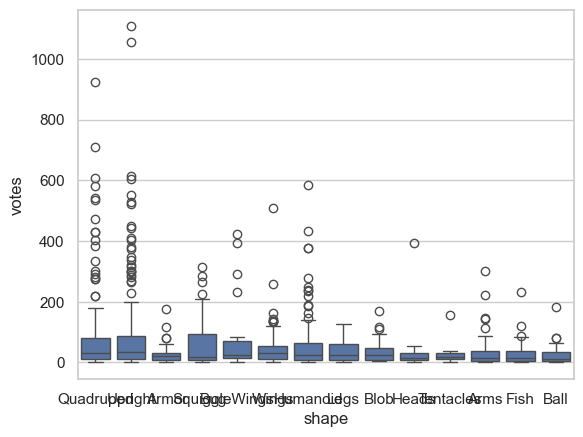

In [56]:
sns.set(style='whitegrid')
 
sns.boxplot(x="shape", y="votes", data=poke)